In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from analysing_entanglement import analysing_entanglement_obj
from analysing_measurement_entanglement import error_obj
from analysing_measurement_entanglement import analysing_entanglement_measurment_obj
from analysing_entanglement import get_pickle_element
from numpy_helpers import *
import math
import numpy as np
import shor_helpers as sh
import numpy_helpers as nph
from qm_shors_algorithm import *
import scipy.stats as stats

path_to_pickles = "/space/ge65kox/BA/pickles/"

obj = pickle.load(open(path_to_pickles+"ana_ent_objs_wo_measurement.pkl","rb"))
obj_meas = pickle.load(open(path_to_pickles+"entanglement_measurment_1.pkl","rb"))

In [3]:
# Load the data
p_success_fourier_mpo = np.array([obj[i].p_success_fourier_mpo for i in range(len(obj))])
p_success_fourier_circuit = np.array([obj[i].p_success_fourier_circuit for i in range(len(obj))])
N = np.array([obj[i].N for i in range(len(obj))])
x= np.array([obj[i].x for i in range(len(obj))])   


In [4]:
p_sucess_measurement = np.array([obj_meas[i].p_success_measurement for i in range(len(obj_meas))])
N_meas = np.array([obj_meas[i].N for i in range(len(obj_meas))])
x_meas = np.array([obj_meas[i].x for i in range(len(obj_meas))])



In [5]:
obj_meas_errors = pickle.load(open(path_to_pickles+"entanglement_measurment_1_errors.pkl","rb"))
print(len(obj_meas_errors))
for i in range(len(obj_meas_errors)):
    print("N: ",obj_meas_errors[i].N,"x: ",obj_meas_errors[i].x,"error: ",obj_meas_errors[i].error)
    print("errror message: ",obj_meas_errors[i].errmsg)

9
N:  6 x:  [10, 31, 31, 23, 41, 51, 49, 20, 43, 35, 44, 17, 2, 37, 88, 74, 56, 32, 92, 101, 87, 5, 90, 55, 82, 47, 112, 50, 58, 24, 61, 44, 152, 133, 104, 82, 103, 39, 58, 167, 13, 92, 113, 73, 35, 31, 66, 7, 84, 53, 169, 166, 215, 98, 218, 134, 41, 54, 210, 92, 21, 29, 20, 106, 204, 74, 34, 84, 239, 107, 52, 200, 103, 292, 251, 101, 90, 58, 10, 79, 101, 90, 58, 10, 79, 206, 38, 44, 136, 164, 19, 107, 152, 52, 107, 68, 146, 14, 132, 19, 148, 170, 53, 244, 110, 127, 139, 181, 251, 141, 161, 173, 157, 176, 91, 59, 46, 88, 292, 292, 216, 134, 249, 197, 202, 8, 281, 305, 312, 313, 332, 173, 199, 333, 310, 271, 294, 355, 153, 349, 362, 77, 193, 134, 25, 89, 149, 268, 139, 329, 191, 302, 188, 348, 389, 350, 232, 89, 122, 317, 11, 204, 20, 405, 263, 6, 167, 221, 20, 199, 300, 94, 206, 68, 122, 47, 95, 486, 304, 363, 10, 397, 259, 377, 248, 342, 211, 409, 61, 336, 428, 329, 279, 137, 356, 476, 148, 542, 521, 213, 118, 541, 125, 67, 353, 173, 107, 119, 475, 162, 311, 201, 136, 403, 571, 47, 53

In [6]:
#get number of prime factors
def calculate_prime_factors(N):
    prime_factors = []
    while N % 2 == 0:
        N = N // 2
        prime_factors.append(2)
        if N == 1:
            return prime_factors
    for factor in range(3, N + 1, 2):
        while N % factor == 0:
            N = N // factor
            prime_factors.append(factor)
            if N == 1:
                return prime_factors

#calculate the order of x^r mod N
def calculate_order(x,N):
    r = 1
    while pow((int)(x),r,mod = (int)(N)) != 1:
        r += 1
    return r

order = [calculate_order(x[i],N[i]) for i in range(len(N))]
len_a = [ (int)(np.ceil(np.log2(N[i]))) for i in range(len(N))]

order_meas = [calculate_order(x_meas[i],N_meas[i]) for i in range(len(N_meas))]


In [7]:
#get euler totient
def calculate_euler_totient(r):
    phi = 0
    for i in range(1,r):
        if math.gcd(i,r) == 1:
            phi += 1
    return phi

euler_totient = [calculate_euler_totient(order[i]) for i in range(len(order))]

#Calculate predicted succes probability
def calculate_predicted_success_probability(order):
    p_predicted = []
    for i in range(len(N)):
        euler_totient = calculate_euler_totient(order[i])
        p_predicted.append(euler_totient/order[i])
    return p_predicted

p_predicted = calculate_predicted_success_probability(order)




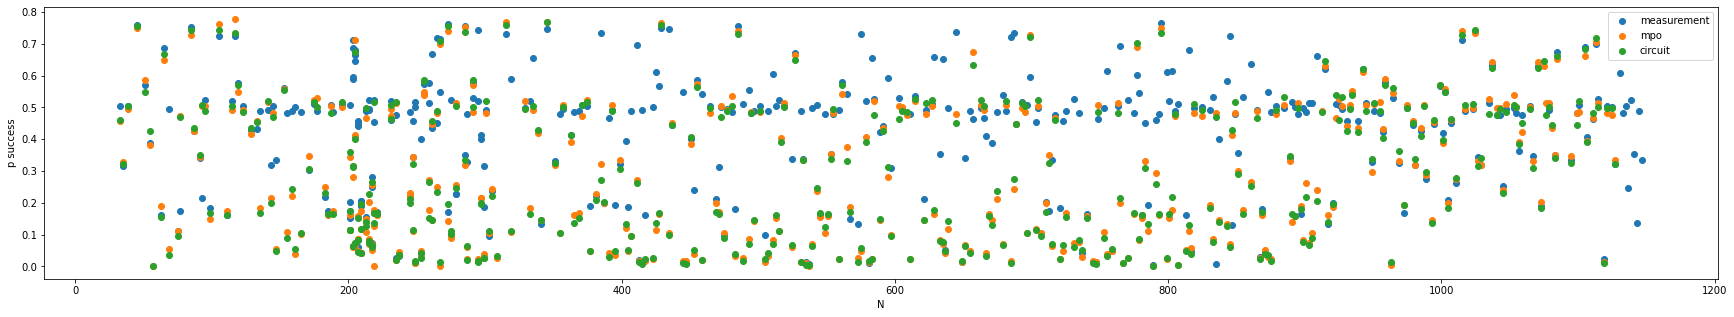

In [8]:


# Plot the data
plt.figure(figsize=(30,5))
plt.scatter(N_meas,p_sucess_measurement,label="measurement")
plt.scatter(N[:len(N_meas)],p_success_fourier_mpo[:len(N_meas)],label="mpo")
plt.scatter(N[:len(N_meas)],p_success_fourier_circuit[:len(N_meas)],label="circuit")
plt.xlabel("N")
plt.ylabel("p success")
plt.legend()
plt.show()


In [9]:
#get maximum_entanglement_entropy
def get_max_entanglement_entropy(entanglement_entropy):
    return np.max(entanglement_entropy)

def get_max_bond_dimension(schmidt_values):
    l = [len(s) for s in schmidt_values]
    return np.max(l) 

In [10]:
#Get the data
entanglement_entropy_before_fourier = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_before_fourier) for i in range(len(obj))])
entanglement_entropy_fourier_mpo = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_mpo) for i in range(len(obj))])
entanglement_entropy_fourier_circuit = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_circuit) for i in range(len(obj))])
entanglement_entropy_before_fourier_meas = np.array([get_max_entanglement_entropy(obj_meas[i].entanglement_entropy_before_fourier) for i in range(len(obj_meas))])
entanglement_entropy_after_measurement = np.array([get_max_entanglement_entropy(obj_meas[i].entanglement_entropy_measurement_before_fourier) for i in range(len(obj_meas))])
entanglement_entropy_measurement_fourier = np.array([get_max_entanglement_entropy(obj_meas[i].entanglement_entropy_measurement_after_fourier) for i in range(len(obj_meas))])



In [11]:
#Get the data
max_bond_dim_before_fourier = np.array([get_max_bond_dimension(obj[i].schmidt_values_before_fourier) for i in range(len(obj))])
max_bond_dim_fourier_mpo = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_mpo) for i in range(len(obj))])
max_bond_dim_fourier_circuit = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_circuit) for i in range(len(obj))])
max_bond_dim_before_fourier_meas = np.array([get_max_bond_dimension(obj_meas[i].schmidt_values_before_fourier) for i in range(len(obj_meas))])
max_bond_dim_measurement_before_fourier = np.array([get_max_bond_dimension(obj_meas[i].schmidt_values_measurement_before_fourier) for i in range(len(obj_meas))])
max_bond_dim_measurement_after_fourier = np.array([get_max_bond_dimension(obj_meas[i].schmidt_values_measurement_after_fourier) for i in range(len(obj_meas))])

print(len(max_bond_dim_before_fourier))
print(len(max_bond_dim_fourier_mpo))
print(len(max_bond_dim_fourier_circuit))
print(len(max_bond_dim_before_fourier_meas))
print(len(max_bond_dim_measurement_before_fourier))
print(len(max_bond_dim_measurement_after_fourier))

404
404
404
395
395
395


In [12]:
figsizes = (12,7.5)

In [13]:
#get outliers
for i in range(len(N)):
    if entanglement_entropy_fourier_circuit[i] < np.log(order[i]):
        print("outlier",i,"N",N[i],"x",x[i],"order",order[i],"entanglement entropy",entanglement_entropy_fourier_mpo[i])

outlier 75 N 201 x 101 order 66 entanglement entropy (0.6931471805599453+0j)
outlier 76 N 203 x 90 order 28 entanglement entropy (0.6931471805599453+0j)
outlier 77 N 205 x 58 order 40 entanglement entropy (0.6931471805599453+0j)
outlier 78 N 207 x 10 order 22 entanglement entropy (0.6931471805599454+0j)
outlier 79 N 209 x 79 order 90 entanglement entropy (0.6931471805599453+0j)
outlier 80 N 201 x 101 order 66 entanglement entropy (0.6931471805599453+0j)
outlier 81 N 203 x 90 order 28 entanglement entropy (0.6931471805599453+0j)
outlier 82 N 205 x 58 order 40 entanglement entropy (0.6931471805599453+0j)
outlier 83 N 207 x 10 order 22 entanglement entropy (0.6931471805599454+0j)
outlier 84 N 209 x 79 order 90 entanglement entropy (0.6931471805599453+0j)
outlier 85 N 213 x 206 order 70 entanglement entropy (0.6931471805599453+0j)
outlier 86 N 215 x 38 order 84 entanglement entropy (0.6931471805599454+0j)
outlier 87 N 217 x 44 order 30 entanglement entropy (0.6931471805599453+0j)
outlier 8

In [18]:
element  = get_pickle_element(122,429,2**13)

N 429
x 122
cx_gate (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
MPS initialized in 0.0013244152069091797
MPO applied in 0.010310173034667969
SWAP gates applied in 0.006700277328491211
MPO applied in 0.01050710678100586
SWAP gates applied in 0.0062291622161865234
MPO applied in 0.010460853576660156
SWAP gates applied in 0.005902767181396484
MPO applied in 0.01040792465209961
SWAP gates applied in 0.005559444427490234
MPO applied in 0.00897979736328125
SWAP gates applied in 0.002386331558227539
MPO applied in 0.004521846771240234
SWAP gates applied in 0.002251148223876953
MPO applied in 0.0052335262298583984
SWAP gates applied in 0.0029201507568359375
MPO applied in 0.005296945571899414
SWAP gates applied in 0.0019421577453613281
MPO applied in 0.005018949508666992
SWAP gates applied in 0.0021491050720214844
MPO applied in 0.0047571659088134766
SWAP gates applied in 0.0016083717346191406
MPO applied in 0.004849433898925781
SWAP gates applied in 0.0016276836395263672
MPO 

N 429
x 122
len_a 21


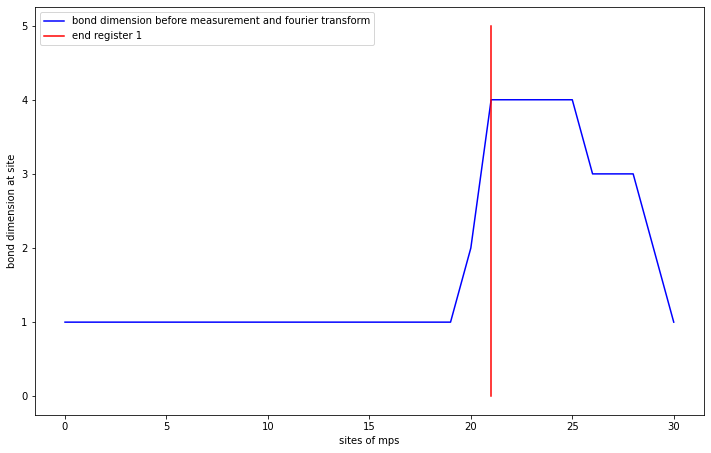

In [19]:
print("N",element.N)
print("x",element.x)
plt.figure(figsize=figsizes)
schmidt_values_before_fourier = element.schmidt_values_before_fourier
s = [len(element.schmidt_values_before_fourier[i]) for i in range(len(element.schmidt_values_before_fourier))]
plt.plot(s,label="bond dimension before measurement and fourier transform",color="blue")
len_a = 2*(int)(np.ceil(np.log2(element.N))) + 3
print("len_a",len_a)
plt.plot([len_a,len_a],[0,s[len_a]+1],label = "end register 1",color="red")
plt.xlabel("sites of mps")
plt.ylabel("bond dimension at site")
plt.legend()
plt.show()